# Timeseries

JAMK examples #4: 04_ts_sales_data

Sisältää mm.

- aikasarjan ryhmittäinen halutun aikajakson mukaisesti

Ladataan käytettävät paketit.

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Luetaan aineisto:

In [22]:
csvUrl = "https://raw.githubusercontent.com/RaimoHaikari/paikkatieto/master/misc/sales_data.csv"
df = pd.read_csv(csvUrl)

df.dtypes

date                object
category            object
sales                int64
price              float64
customer_age         int64
customer_gender     object
dtype: object

Muunnetaan date-sarake aikaleimaksi, tämä käy [to_datetime()-funktion](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) avulla.

Muutos nähdään päivittyneenä sarakeen tietotyyppinä....

In [23]:
# Convert the 'date' column to the datetime
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date               datetime64[ns]
category                   object
sales                       int64
price                     float64
customer_age                int64
customer_gender            object
dtype: object

Kun indeksin arvoksi asetetaan aikaleima, on meillä käsissämme aikasarja.

In [24]:
df.set_index('date', inplace=True)

Lasketaan viikottaiset kokonaismyynnit. Huom. alkuperäisessä materiaalissa tutkitaan päivittäisiä myyntejä.

[resample()-funktion](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) avulla aikasarja saadaan ryhmiteltyä haluttua aikajaksoa vastaavalla tavalla.


In [29]:
weekly_sales = df.resample('W').sum(numeric_only=True)

Tulostetaan viikkomyynnin kehitystä kuvaava käppyrä.

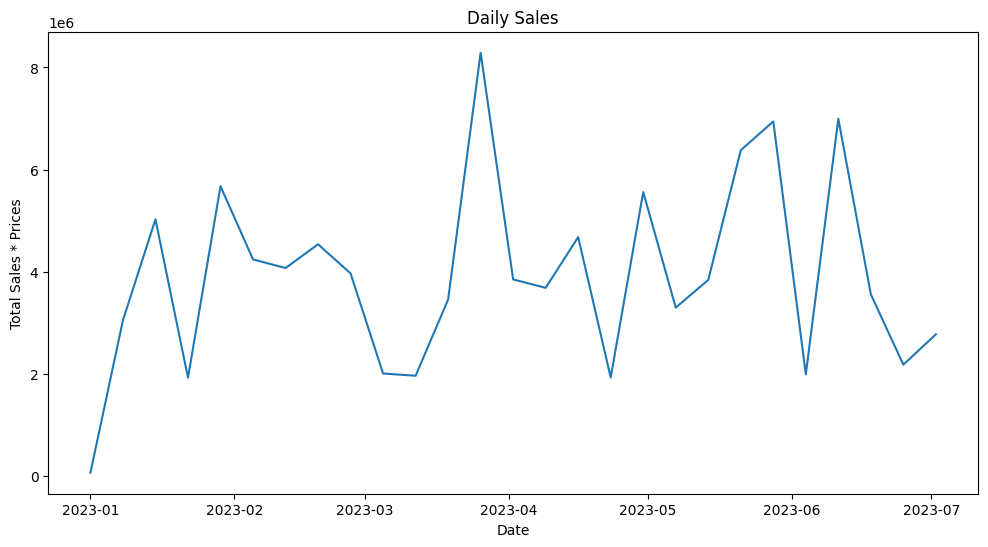

In [31]:
# Visualize the daily sales
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_sales.index, y=(weekly_sales['sales'] * weekly_sales['price']))
plt.xlabel('Date')
plt.ylabel('Total Sales * Prices')
plt.title('Daily Sales')
plt.show()